---
# Description

An exploratory data analysis of PCSO draw results

---


# Objective

This project only deals with **exploratory analysis**, where the main objective is understanding how the data is distributed and generate an insight for future reference. This particular analysis focuses on the Ultra Lotto 6/58.

<i>Disclaimer : Remember that lotteries are designed to be random, so while EDA can reveal patterns in historical data, it does not guarantee future success in predicting winning combinations. These analyses are mostly for curiosity and entertainment, and they should not be used as a basis for gambling.

Always gamble responsibly, and consider the odds and risks associated with playing the lottery.</i>

---

# Outline

*A.Data Preprocessing*

*B.Descriptive Analysis*
1. [Frequency Distribution](#freq)
2. [Central Tendency](#cten)

*C.Exploratory Analysis*
1. [Heatmap](#hmap)

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pcso = pd.read_csv("~/Documents/data/pcso_data.csv",index_col=0)

In [3]:
pcso.head()

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,47-02-04-44-54-25,10/2/2023,"29,700,000.00",0
1,Megalotto 6/45,08-05-38-25-13-29,10/2/2023,"61,119,311.20",0
2,4D Lotto,2-2-7-0,10/2/2023,"55,899.00",15
3,3D Lotto 2PM,5-3-4,10/2/2023,"4,500.00",247
4,3D Lotto 5PM,9-6-9,10/2/2023,"4,500.00",164


In [4]:
pcso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32996 entries, 0 to 32995
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LOTTO GAME     32996 non-null  object
 1   COMBINATIONS   32996 non-null  object
 2   DRAW DATE      32996 non-null  object
 3   JACKPOT (PHP)  32996 non-null  object
 4   WINNERS        32996 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
nullVals = pcso.isnull().sum().sum()
print(nullVals)

0


>Therefore there are no null values

In [6]:
pcso.columns

Index(['LOTTO GAME', 'COMBINATIONS', 'DRAW DATE', 'JACKPOT (PHP)', 'WINNERS'], dtype='object')

In [7]:
uniqueVals = pcso["LOTTO GAME"].unique()
print(uniqueVals)

['Grand Lotto 6/55' 'Megalotto 6/45' '4D Lotto' '3D Lotto 2PM'
 '3D Lotto 5PM' '3D Lotto 9PM' '2D Lotto 2PM' '2D Lotto 5PM'
 '2D Lotto 9PM' 'Ultra Lotto 6/58' 'Superlotto 6/49' 'Lotto 6/42'
 '6D Lotto' 'Suertres Lotto 11:30AM' 'Suertres Lotto 12:30PM'
 'Suertres Lotto 2PM' 'EZ2 Lotto 2PM' 'EZ2 Lotto 11:30AM'
 'EZ2 Lotto 12:30PM']


In [8]:
dfULotto = pcso[(pcso["LOTTO GAME"] == "Ultra Lotto 6/58")]
dfULotto.loc[:,"JACKPOT (PHP)"] = dfULotto["JACKPOT (PHP)"].str.replace(",","").astype(float)
dfSortedULotto = dfULotto.sort_values(by="JACKPOT (PHP)", ascending=False)
dfSortedULotto

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
14723,Ultra Lotto 6/58,40-50-37-25-01-45,10/14/2018,1180622508.0,2
14741,Ultra Lotto 6/58,28-14-54-50-17-27,10/12/2018,1112647388.0,0
14769,Ultra Lotto 6/58,12-16-46-03-38-36,10/9/2018,1026264340.0,0
14786,Ultra Lotto 6/58,45-21-02-30-07-10,10/7/2018,954503164.0,0
14804,Ultra Lotto 6/58,01-30-27-36-49-12,10/5/2018,903290152.0,0
...,...,...,...,...,...
11423,Ultra Lotto 6/58,45-43-02-47-13-58,10/20/2019,49500000.0,0
11440,Ultra Lotto 6/58,55-37-11-21-18-45,10/18/2019,49500000.0,0
11467,Ultra Lotto 6/58,13-23-09-58-38-14,10/15/2019,49500000.0,0
11486,Ultra Lotto 6/58,13-31-17-22-35-36,10/13/2019,49500000.0,0


---
## Frequency Distribution
<a id='freq'></a>

---

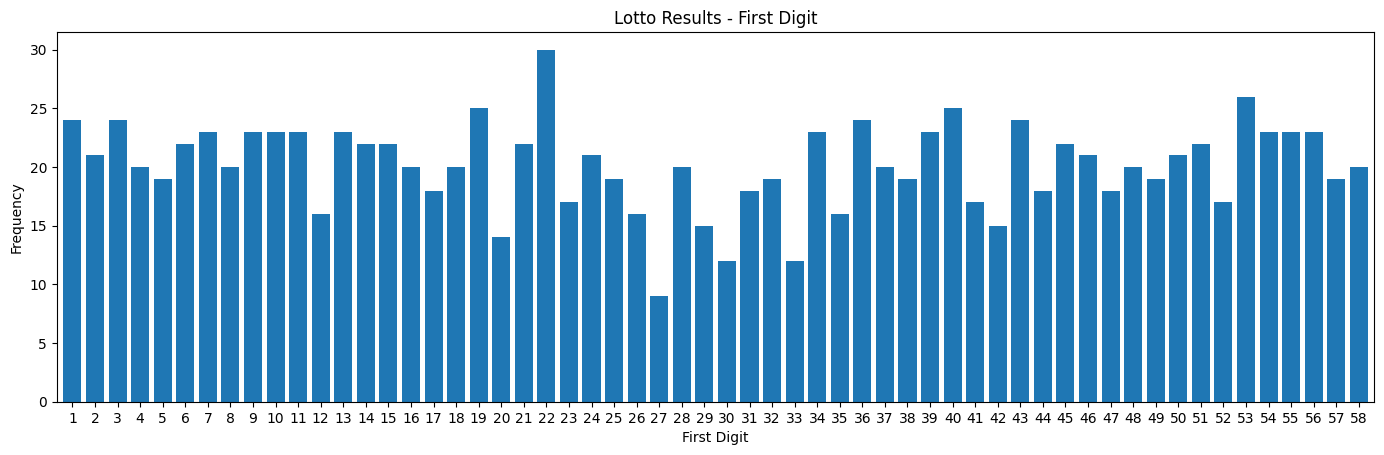

In [9]:
combArray = dfSortedULotto["COMBINATIONS"].to_numpy()
digitTarget = []
xValues = range(1,59)
yValues = {key:0 for key in range(1,59)}

def getDigit(digit):
    for x in combArray:
        lottoDigit = int(x.split("-")[digit-1])
        if str(lottoDigit).startswith("0"):
            lottoDigit = str(lottoDigit)[:-1]
            digitTarget.append(lottoDigit)
        else:
            digitTarget.append(lottoDigit)

def getyValues():
    for y in digitTarget:
        if y in yValues:
            yValues[y]+= 1

def clearyValues():
    for z in yValues:
        yValues[z] = 0

def pltFigure(title,xlabel):
    plt.figure().set_figwidth(17)
    plt.margins(x=0.005,tight=True)
    plt.bar(xValues,yValues.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.xticks(range(1,59))
    plt.show()

getDigit(1)
getyValues()
pltFigure("Lotto Results - First Digit","First Digit")

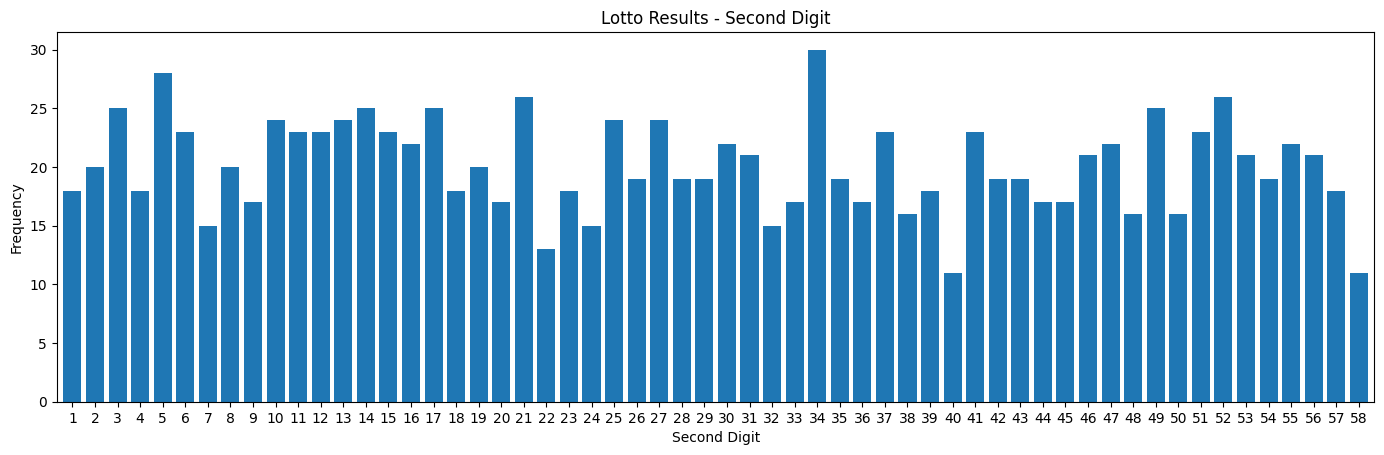

In [10]:
digitTarget = []
clearyValues()
getDigit(2)
getyValues()
pltFigure("Lotto Results - Second Digit","Second Digit")

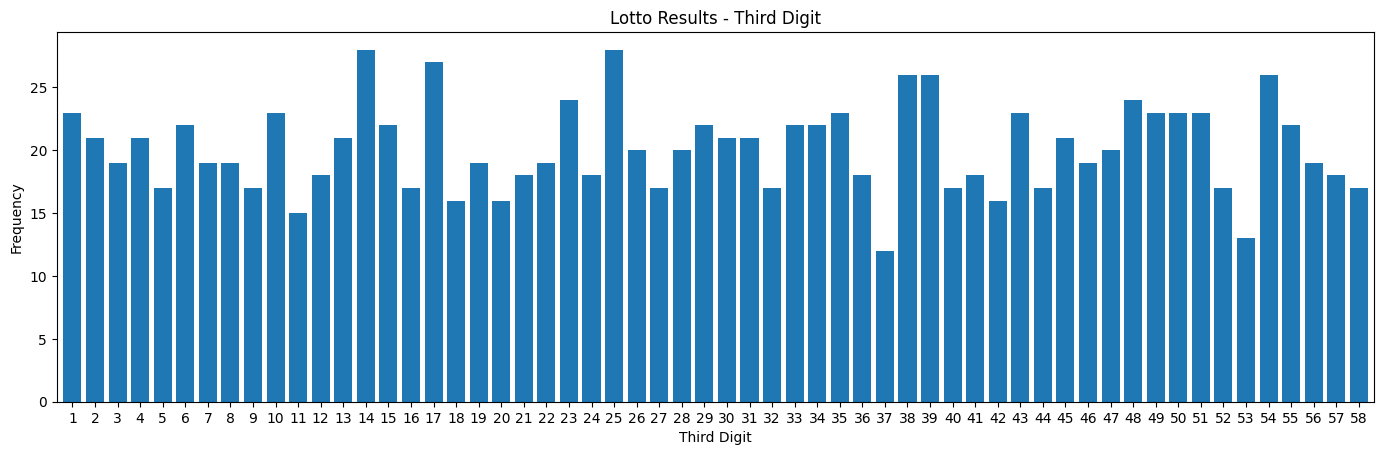

In [11]:
digitTarget = []
clearyValues()
getDigit(3)
getyValues()
pltFigure("Lotto Results - Third Digit","Third Digit")

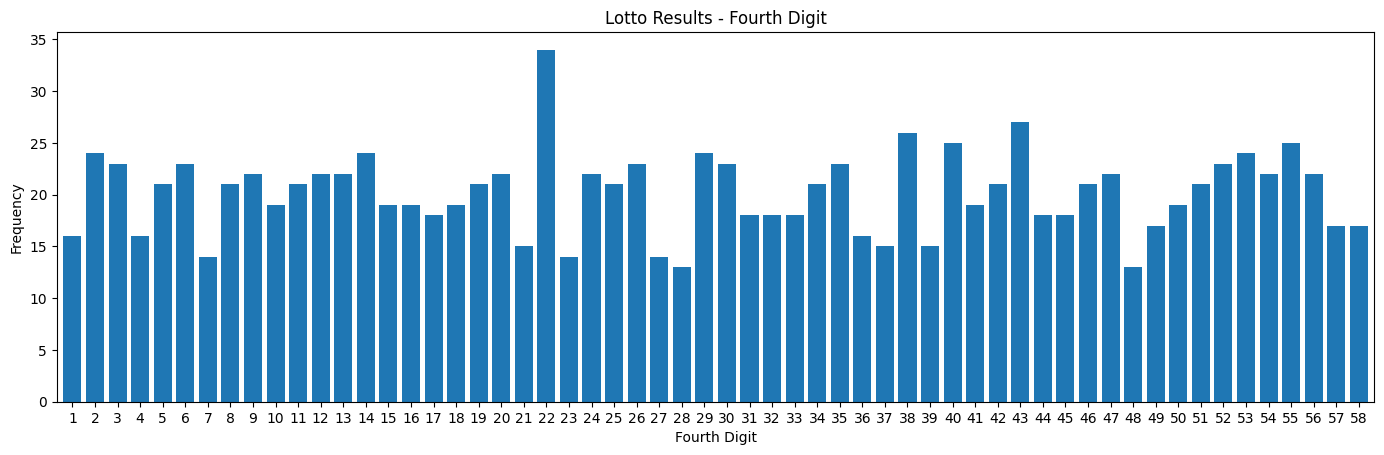

In [12]:
digitTarget = []
clearyValues()
getDigit(4)
getyValues()
pltFigure("Lotto Results - Fourth Digit","Fourth Digit")

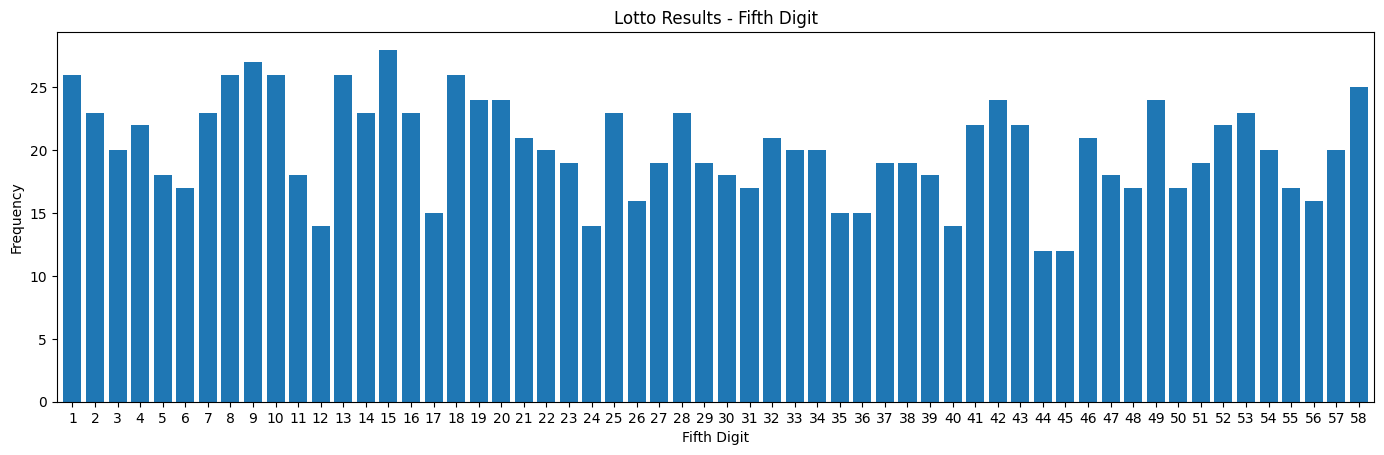

In [13]:
digitTarget = []
clearyValues()
getDigit(5)
getyValues()
pltFigure("Lotto Results - Fifth Digit","Fifth Digit")

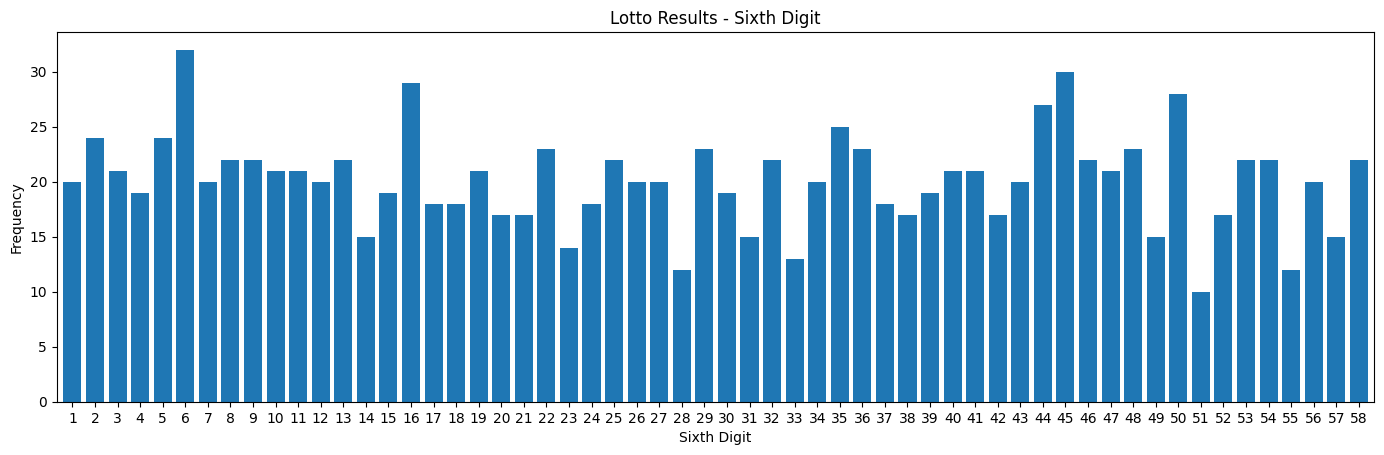

In [14]:
digitTarget = []
clearyValues()
getDigit(6)
getyValues()
pltFigure("Lotto Results - Sixth Digit","Sixth Digit")

---
## Central Tendency
<a id="cten"></a>

---

>Assuming that each lottery draw is an independent event or every number has an equal chance of being drawn with no relation to previous draws, This means that there is no inherent "average" combination which can be identified. Therefore, the concept of central tendency, which is based on patterns and averages, may not apply as directly to lotto combinations. 

In [15]:
split_arr = []

for item in combArray:
    enum = list(map(int,item.split("-")))
    split_arr.append(enum)

sumCombi = np.sum(split_arr,axis=1)
sumCombi = np.sort(sumCombi)

The mean of the data is 174.57 and median is 174.0. The standard deviation is the 40.34
Within 1 Standard Deviation: 66.5 %
Within 2 Standard Deviations: 95.73 %
Within 3 Standard Deviations: 99.83 %


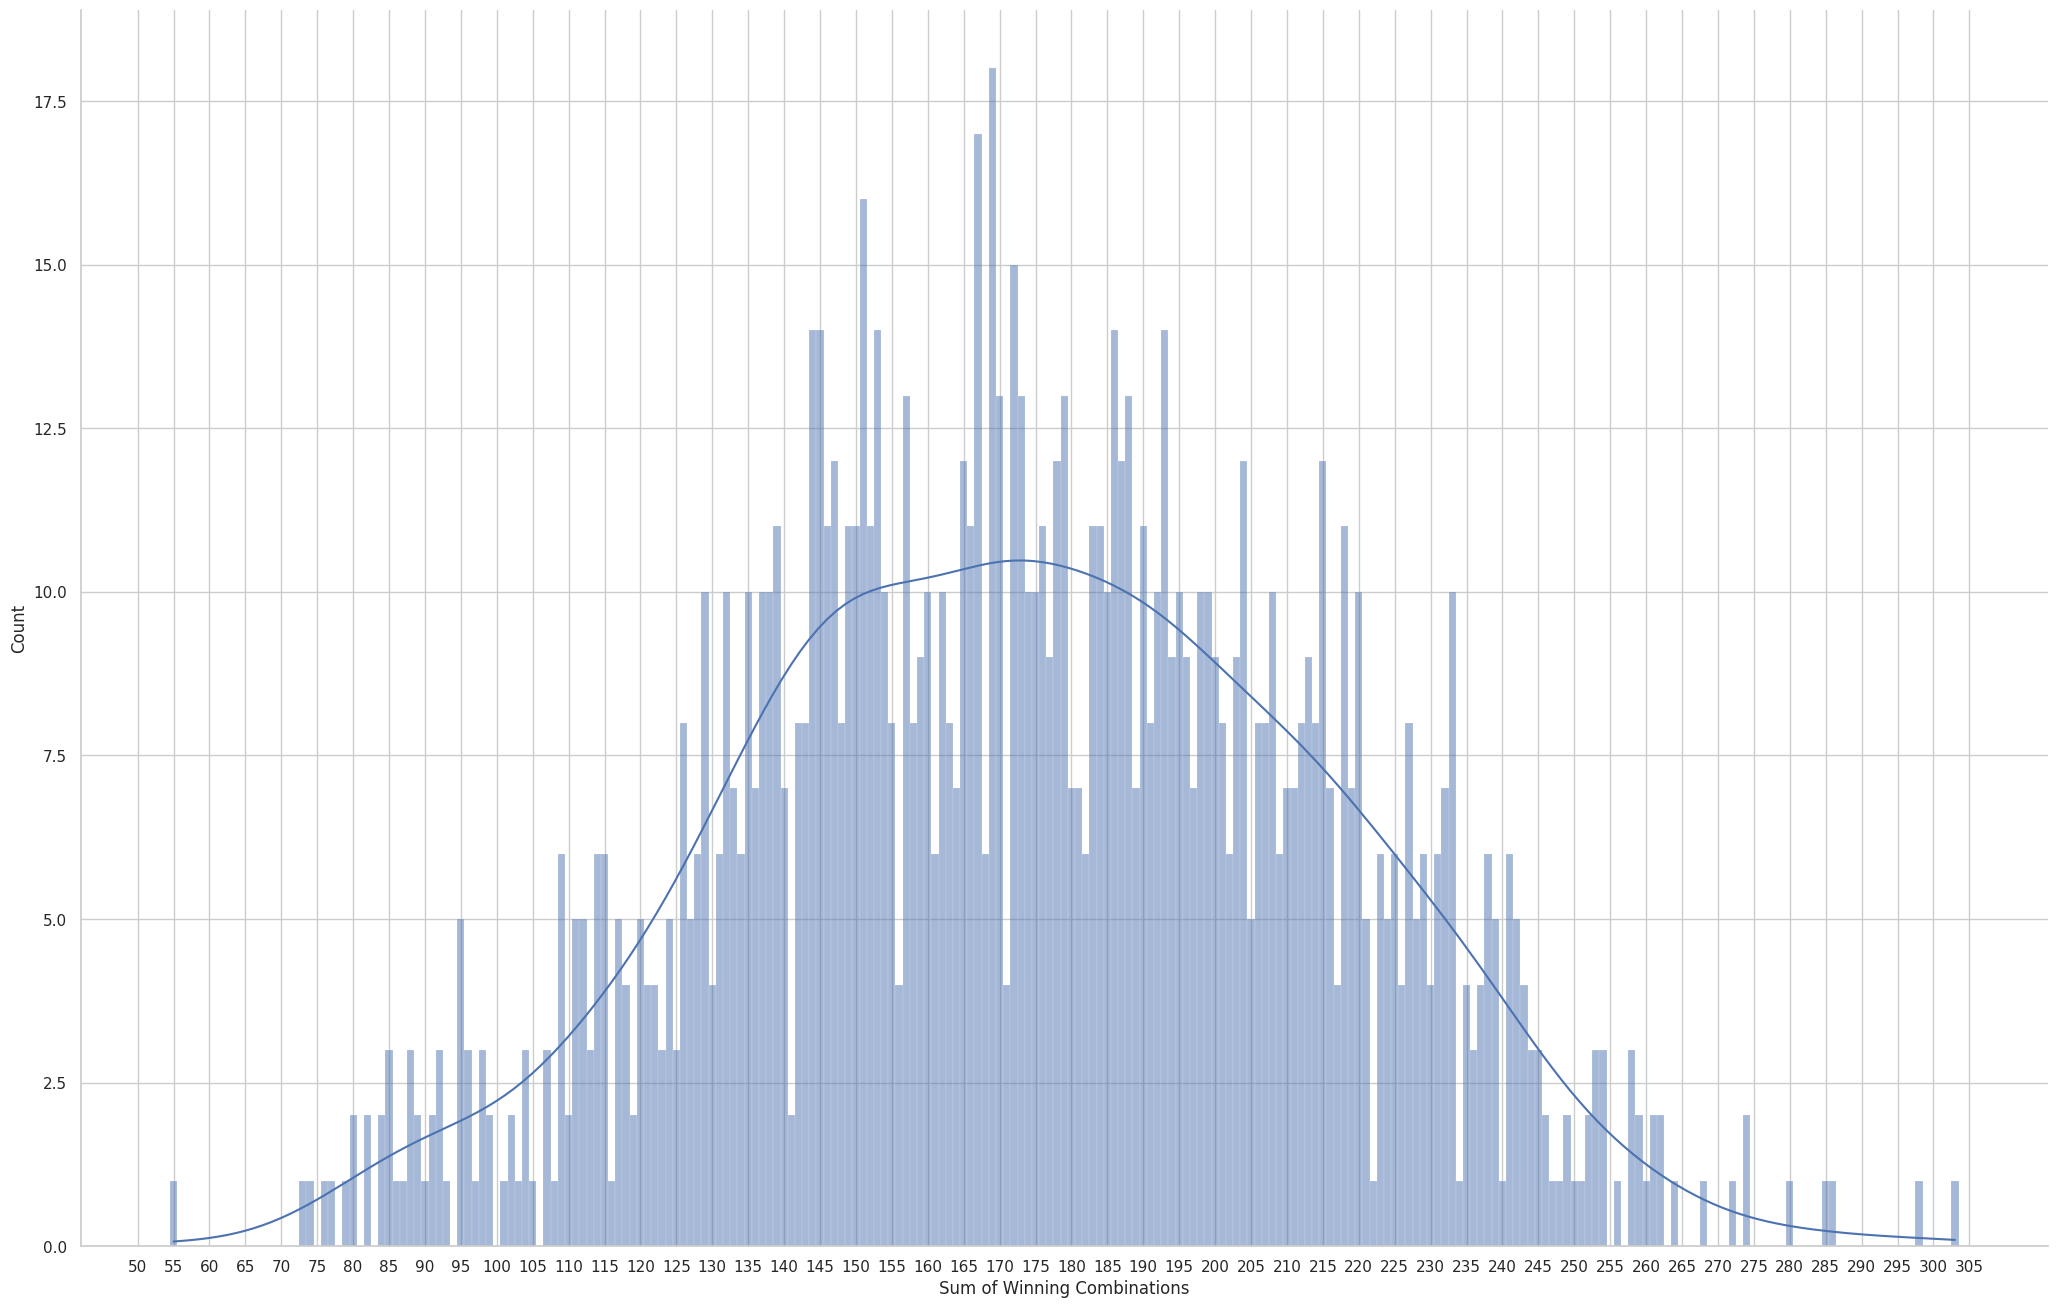

In [16]:
dfTest = pd.DataFrame(sumCombi)
dfTest.columns = ["Sum of Winning Combinations"]
mean = np.mean(sumCombi)
median = np.median(sumCombi)
stdDev = np.std(sumCombi)  
print(f"The mean of the data is {round(mean,2)} and median is {median}. The standard deviation is the {round(stdDev,2)}")

#1 STD(68%)
within_one_std_dev = np.sum(np.abs(sumCombi - mean) <= stdDev) / len(sumCombi) * 100
#2 STD(95%)
within_two_std_dev = np.sum(np.abs(sumCombi - mean) <= 2 * stdDev) / len(sumCombi) * 100
#3 STD(99.7%)
within_three_std_dev = np.sum(np.abs(sumCombi - mean) <= 3 * stdDev) / len(sumCombi) * 100

print(f"Within 1 Standard Deviation: {round(within_one_std_dev,2)} %")
print(f"Within 2 Standard Deviations: {round(within_two_std_dev,2)} %")
print(f"Within 3 Standard Deviations: {round(within_three_std_dev,2)} %")

sns.set(style="whitegrid")
dist = sns.displot(dfTest,x="Sum of Winning Combinations",kde=True,discrete=True)
dist.figure.set_figwidth(25)
dist.figure.set_figheight(15)
plt.xticks(np.arange(50,310,5))
plt.show()

---
# Exploratory Analysis
<a id="exanal"></a>

---

1. **Heatmap**
>To summarize the results of the digit analysis earlier and visualize it easier, it is advantageous to construct a heatmap where the intensity is the frequency, lotto numbers and digits are on the axes.
<a id="hmap"></a>

---

In [17]:
digitTarget = []
clearyValues()
getDigit(1)
getyValues()
dfHeatmap = pd.DataFrame()

def mainArr(dig):
    lottoArray = {"DIGIT": dig,
                "LOTTO NUMBER": np.arange(1,59),
                "FREQUENCY": yValues.values()}
    dfHeatmap = pd.DataFrame(lottoArray)
    return dfHeatmap

dfHeatmap = pd.DataFrame(mainArr(1))

In [18]:
digitTarget = []
clearyValues()
getDigit(2)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(2))])

In [19]:
digitTarget = []
clearyValues()
getDigit(3)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(3))])

In [20]:
digitTarget = []
clearyValues()
getDigit(4)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(4))])

In [21]:
digitTarget = []
clearyValues()
getDigit(5)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(5))])

In [22]:
digitTarget = []
clearyValues()
getDigit(6)
getyValues()

dfHeatmap = pd.concat([dfHeatmap,pd.DataFrame(mainArr(6))])

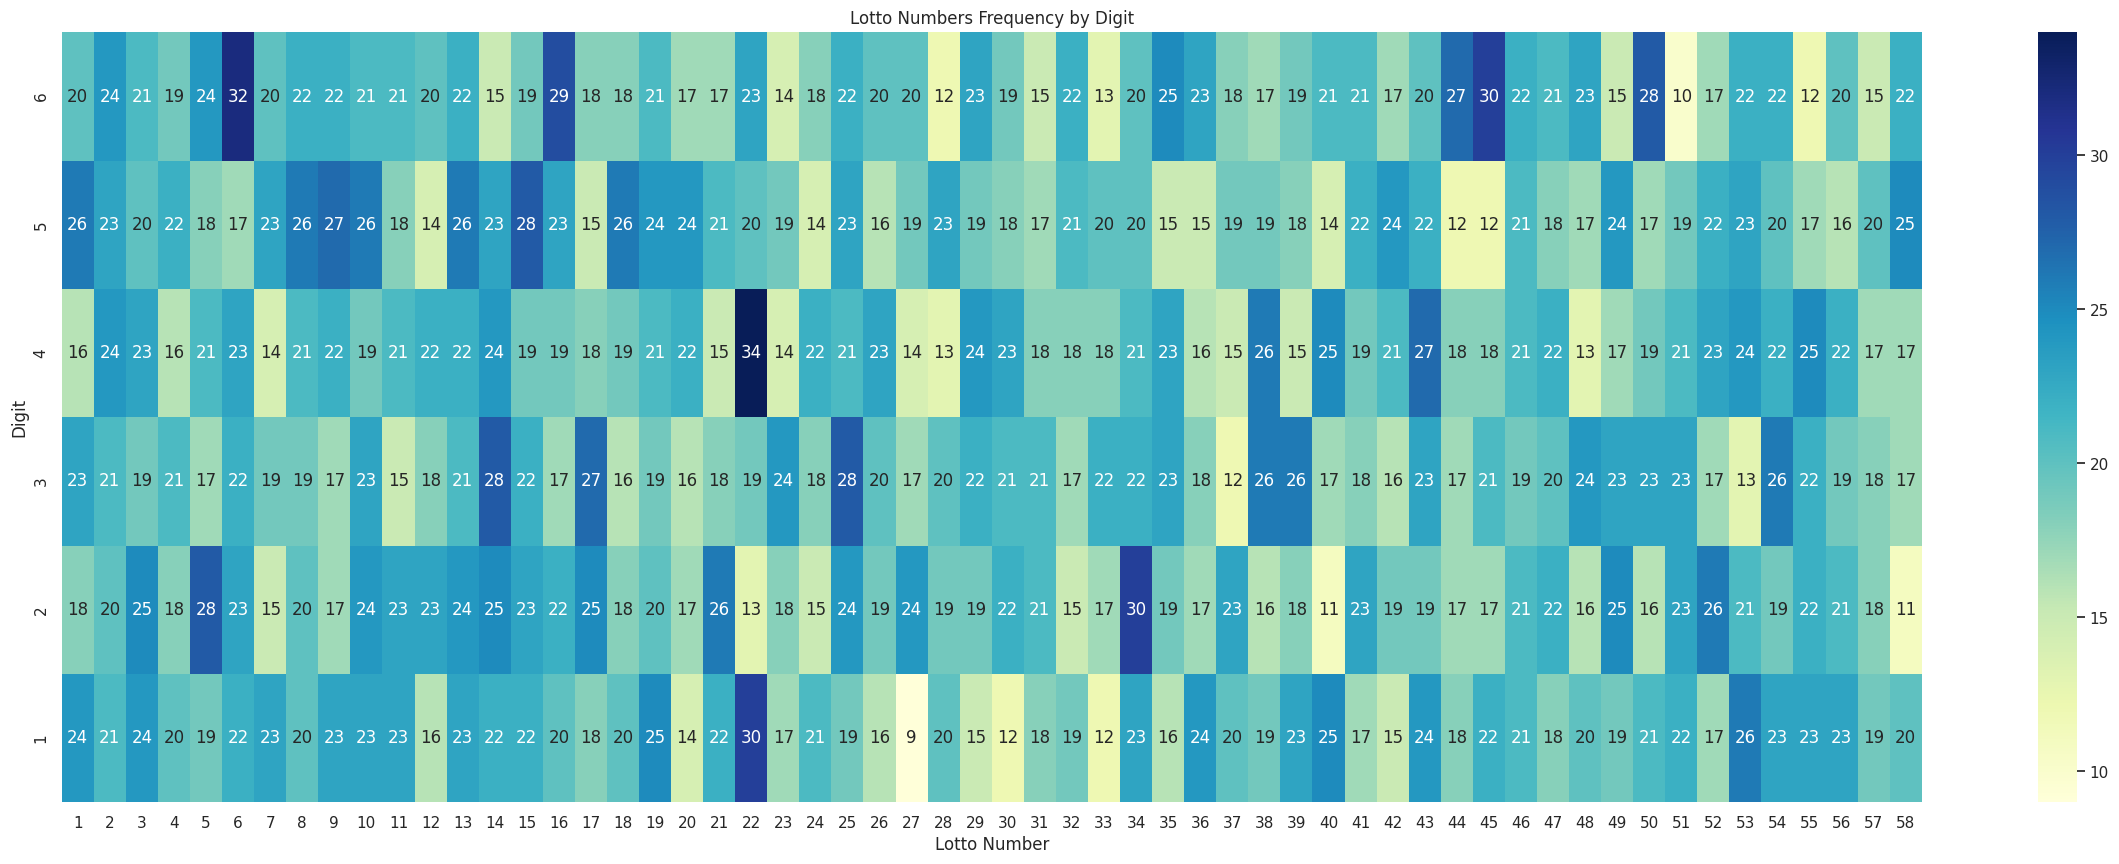

In [23]:
dataHeatmap = dfHeatmap.pivot(columns="LOTTO NUMBER",index="DIGIT",values="FREQUENCY")

plt.figure(figsize=(30,10))
sns.heatmap(dataHeatmap,cmap="YlGnBu",annot=True).invert_yaxis()

plt.xlabel("Lotto Number")
plt.ylabel("Digit")
plt.title("Lotto Numbers Frequency by Digit")
plt.show()